# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Exploración y Curación de Datos 

En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


- Instalación de paquetes a utilizar

In [1]:
##El dataset que estamos analizando tendría la estructura de datos de panel. Es decir un conjunto de datos que combinan una dimensión temporal 
###y otra transversal.
## A los fines de darle continuidad al análisis en el práctico 1, en la primera parte de esta receta vamos a pesar al dataset 
###como un conjunto de series 
##de tiempo donde el periodo abarca 2017- 2022 y las unidades de análisis son los osm_id con su 'name' asociado en los casos que está informado.

In [2]:
# Setup necesario para correr pandas profiling
#!pip install --upgrade pip
#!pip install pandas_profiling==2.8.0
#!pip install pandas-profiling[notebook]

#!pip install pandas_profiling  
# Run this from Jupytor notebook Ignore the warnings if any 
#from pandas_profiling import ProfileReport 
#restart the kernel if throws error
########################################
# Importación necesaria para correr pandas profiling y descargar reporte
#from pandas_profiling import ProfileReport
##from google.colab import files
########################################
# Descarga de base de datos
 #from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
#########################################
#!pip install gdown
#!pip install missingno
#!pip install statsmodels

In [3]:
# Descarga de archivo
#!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

In [4]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime
######
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
##se levanta el dataset y se define a la fecha como índice
df_=pd.read_csv("C:/Users/Varios/Desktop/Diplodatos/Mentoria/espacios-verdes-indexs-cba-20170101-20220420.zip",index_col=0,parse_dates=['date'])
df_ = df_.set_index('date')
display(df_.head())

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_mean,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.924291,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032
2017-01-03,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.979787,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513
2017-01-03,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.979928,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528
2017-01-03,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.983599,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640
2017-01-03,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,1.000021,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048


In [6]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208932 entries, 2017-01-03 to 2022-04-17
Columns: 166 entries, B02_min to area_m2
dtypes: float64(140), int64(24), object(2)
memory usage: 266.2+ MB


In [7]:
frecuencia_de_medicion_de_datos = (pd.Series(df_.index[1:]) - pd.Series(df_.index[:-1])).value_counts()
frecuencia_de_medicion_de_datos

0 days     208656
5 days        204
10 days        47
15 days        13
20 days         9
25 days         1
40 days         1
Name: date, dtype: int64

In [8]:
#df_.info(verbose=True, show_counts=True)

In [9]:
#msno.bar(df_,figsize=(10,20) ,sort="ascending",fontsize=10, color='tomato',orientation=u'horizontal') 

In [10]:
#msno.matrix(df_,figsize=(30, 10), fontsize=12, color=[0,0,0.2])

- Extraer las columnas de interes (## ab-initio)

In [11]:
# Creamos un nuevo dataframe con las columnas de interés ya utilizadas en el trabajo práctico 1
df_interest_A1 = df_[["osm_id","area_m2","raster","name","B02_median", "B06_median", "B11_median", "ndvi_max", "clouds_on_raster"]]
len(df_interest_A1)
df_interest_A1.shape
##se convierte en dataframe
df_interest_A1=pd.DataFrame(df_interest_A1)

In [12]:
##Para analizar en términos de series temporales se elige nuevamente el espacio verde "Parque Sarmiento"
df_interest_A1_ps=df_interest_A1[df_interest_A1['name']=='Parque Sarmiento']
import pandas as pd
pd.infer_freq(df_interest_A1_ps.index.values)

In [13]:
counts=df_interest_A1_ps['osm_id'].value_counts()
counts
frecuencia_medicion_parque_sarmiento = (pd.Series(df_interest_A1_ps.index[1:]) - pd.Series(df_interest_A1_ps.index[:-1])).value_counts()
frecuencia_medicion_parque_sarmiento

5 days     204
10 days     47
15 days     13
20 days      9
25 days      1
40 days      1
Name: date, dtype: int64

In [14]:
df_interest_A1_ps
df_interest_A1_ps = df_interest_A1_ps.sort_index()
df_interest_A1_ps.describe()

,osm_id,area_m2,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster
count,276.0,2.760000e+02,234.000000,234.000000,234.000000,234.000000,276.000000
mean,6170329.0,8.596086e+05,0.122369,0.196468,0.201261,0.661145,19.473638
std,0.0,3.032297e-09,0.033647,0.035754,0.040825,0.115607,33.484649
min,6170329.0,8.596086e+05,0.085600,0.080900,0.047800,0.179545,0.000000
25%,6170329.0,8.596086e+05,0.104850,0.172250,0.177163,0.598568,0.000000
50%,6170329.0,8.596086e+05,0.113900,0.192675,0.194850,0.690800,0.000000
75%,6170329.0,8.596086e+05,0.122875,0.210175,0.220625,0.747407,25.009939
max,6170329.0,8.596086e+05,0.293900,0.348050,0.357400,0.809364,100.000000


<Figure size 432x288 with 0 Axes>

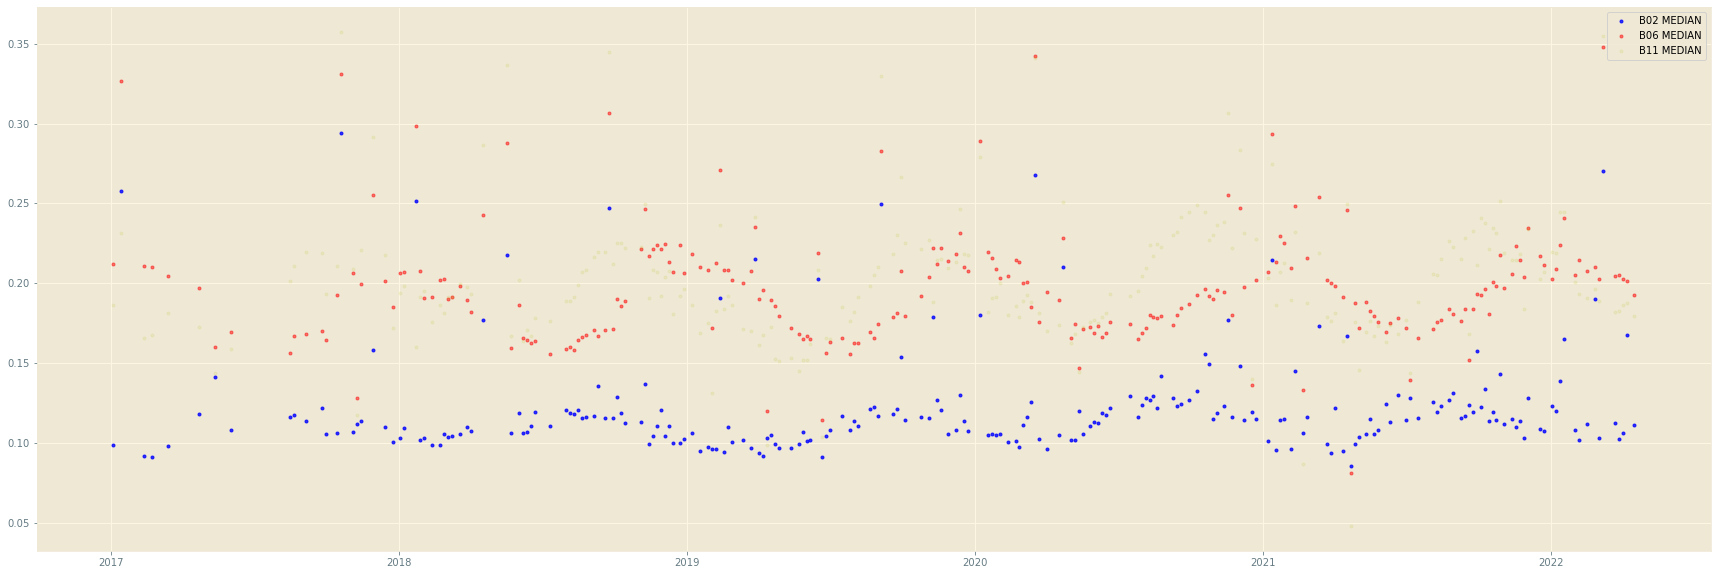

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(30,10))
from matplotlib import style
########  
# using the style for the plot
plt.style.use('Solarize_Light2')
########  
plt.plot(df_interest_A1_ps['B02_median'], 'b.', label = 'B02 MEDIAN',linewidth=0.5,alpha=0.8)
plt.plot(df_interest_A1_ps['B06_median'], 'r.', label = 'B06 MEDIAN',linewidth=0.5,alpha=0.5)
plt.plot(df_interest_A1_ps['B11_median'], 'y.', label = 'B11 MEDIAN',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

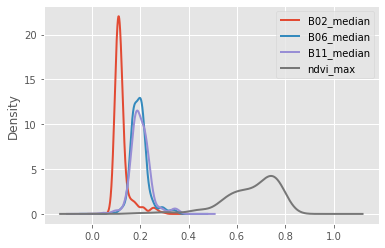

<Figure size 432x288 with 0 Axes>

In [16]:
#densidades de las variables asociadas a las bandas
plt.style.use('ggplot')
df_interest_A1_ps['B02_median'].plot.kde()
df_interest_A1_ps['B06_median'].plot.kde()
df_interest_A1_ps['B11_median'].plot.kde()
df_interest_A1_ps['ndvi_max'].plot.kde()
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

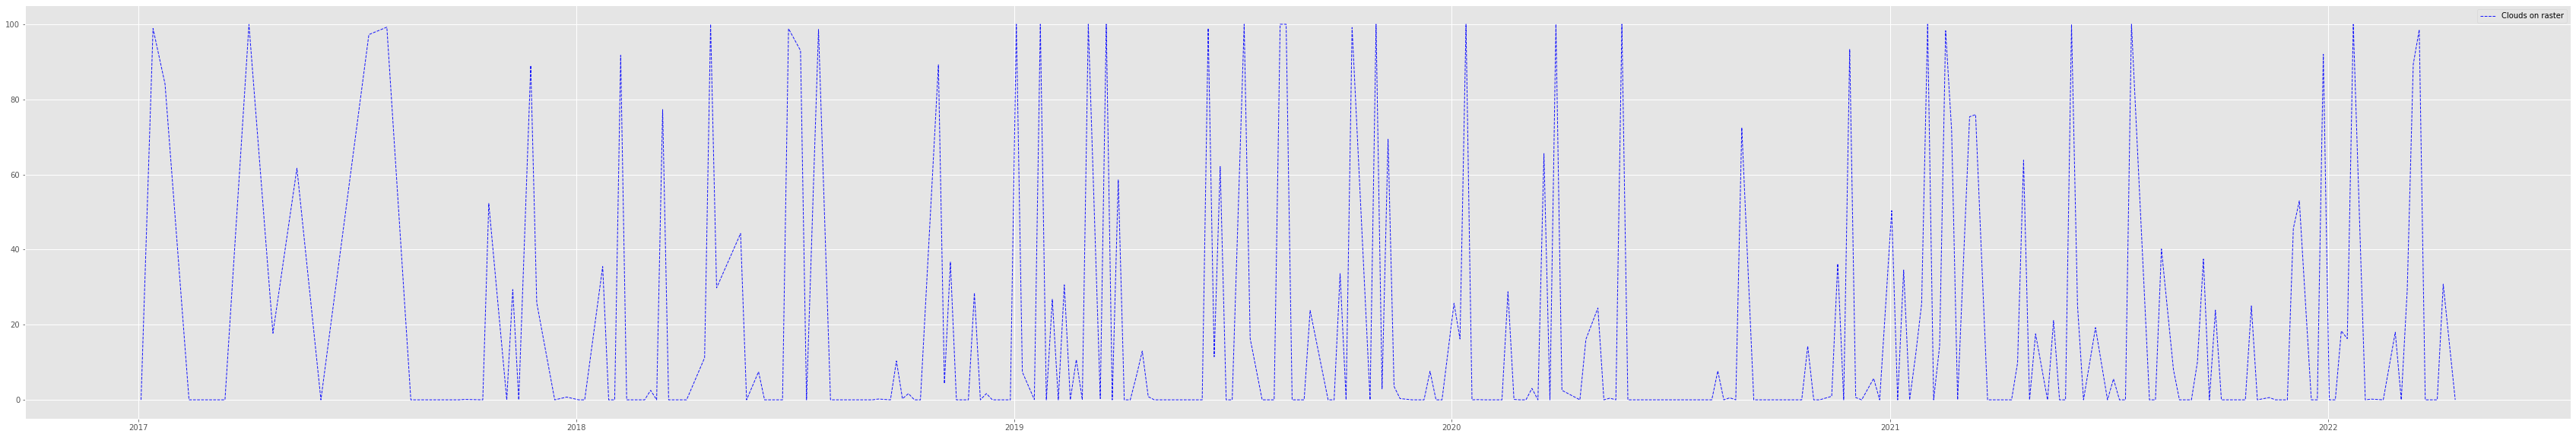

<Figure size 432x288 with 0 Axes>

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(60,10))
plt.plot(df_interest_A1_ps['clouds_on_raster'], 'b--', label = 'Clouds on raster',linewidth=1,alpha=0.9)
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

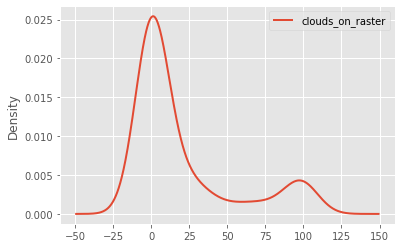

<Figure size 432x288 with 0 Axes>

In [18]:
##densidad de la variable "clouds on raster"
df_interest_A1_ps['clouds_on_raster'].plot.kde()
plt.legend()
plt.figure()

In [19]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno

<AxesSubplot:>

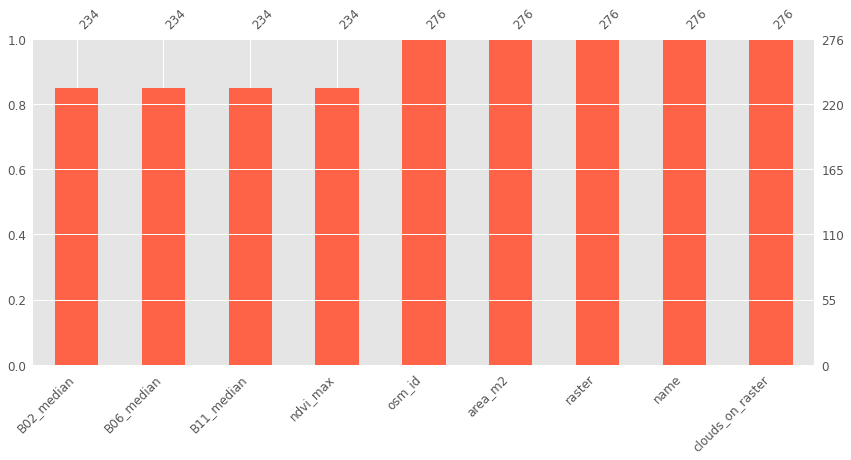

In [20]:
# Graficamos los datos faltantes de varias variables, incluidas las de interés
msno.bar(df_interest_A1_ps,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 

Receta con descomposición de serie de tiempo

#Bajo esta alternativa se remueven los outliers a partir de las variaciones observadas en el componente "ruido" de la serie de tiempo.

#Primero se prueba con 5 métodos alternativos de imputación de valores nulos.

#Luego se descompone la serie en tendencia, estacionalidad y ruido suponiendo que está modelada de forma : aditiva  dado que la serie de tiempo sería estacionaria.

#El modelo aditivo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie no varıa al hacerlo la tendencia.

#y_i = t_i + s_i + n_i

#where y_i = el valor que asume la serie de tiempo en el momento i.
#t_i = el componente tendencia en el momento i -presenta las variaciones a largo plazo-.
#s_i = el componente estacional en el momento i -releja las variaciones a corto plazo-.
#n_i = el ruido en el momenot i.

#El modelo multiplicativo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie crece y decrece
#proporcionalmente con los crecimientos y decrecimientos
#de la tendencia, respectivamente.

#y_i = t_i * s_i * n_i
################################################################

In [21]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos una copia
df_interest_extra2 = df_interest_A1_ps.copy()
len(df_interest_extra2)
pd.infer_freq(df_interest_extra2.index.values)

In [22]:
from statsmodels.tsa import seasonal
import numpy as np
import pandas as pd

In [23]:
df_interest_extra2.describe()

,osm_id,area_m2,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster
count,276.0,2.760000e+02,234.000000,234.000000,234.000000,234.000000,276.000000
mean,6170329.0,8.596086e+05,0.122369,0.196468,0.201261,0.661145,19.473638
std,0.0,3.032297e-09,0.033647,0.035754,0.040825,0.115607,33.484649
min,6170329.0,8.596086e+05,0.085600,0.080900,0.047800,0.179545,0.000000
25%,6170329.0,8.596086e+05,0.104850,0.172250,0.177163,0.598568,0.000000
50%,6170329.0,8.596086e+05,0.113900,0.192675,0.194850,0.690800,0.000000
75%,6170329.0,8.596086e+05,0.122875,0.210175,0.220625,0.747407,25.009939
max,6170329.0,8.596086e+05,0.293900,0.348050,0.357400,0.809364,100.000000


In [24]:
res = (pd.Series(df_interest_extra2.index[1:]) - pd.Series(df_interest_extra2.index[:-1])).value_counts()
res

5 days     204
10 days     47
15 days     13
20 days      9
25 days      1
40 days      1
Name: date, dtype: int64

La elección del método de imputación, requiere del conocimiento de la naturaleza del problema de los datos que faltan en el dataset a imputar. Como vimos en el práctico pasado, es posible que la falta de registros en este dataset sea debido a un error no aleatorio correspondiente a características no observadas. Esto acota la disponibilidad de métodos de imputación. Podríamos considerar el uso de técnicas como KNN (vecino más cercano). Sin embargo, para la imputación de valores faltantes en una variable dada, KNN define con mayor precisión los vecinos cercanos si se utilizan variables de soporte que contengan datos para el mismo registro donde faltan datos en la variable dada. En el caso de este dataset, lamentablemente, los registros que faltan para una variable, son los mismos que para las otras, impidiendo una estimación adecuada por KNN. Esto puede verse claramente en la siguiente gráfica.   
Bajo esta receta se prueba cuatro métodos alternativos y finalmente optamos por imputar por el método slinear.

<AxesSubplot:>

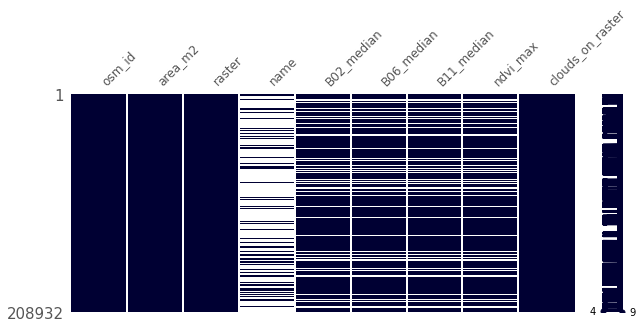

In [25]:
msno.matrix(df_interest_A1,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

<AxesSubplot:>

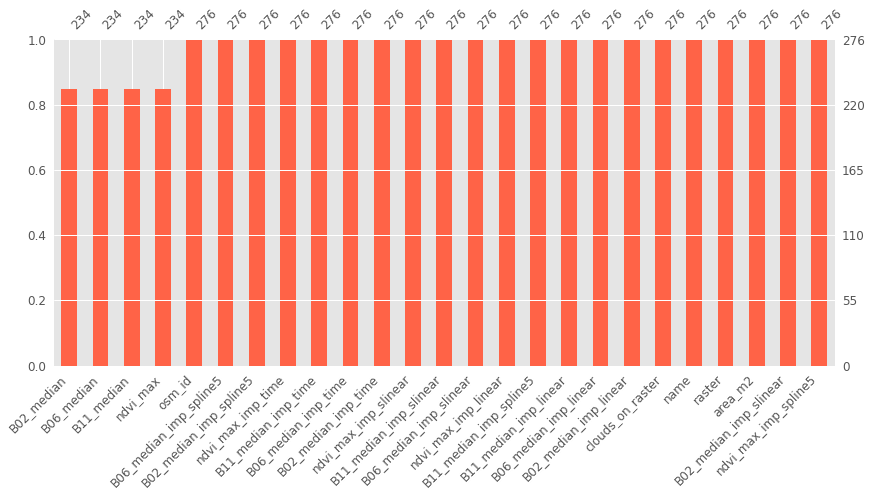

In [26]:
##Imputación de valores faltantes con métodos alternativos
#Interpolación lineal: Esta técnica se origina en el análisis numérico, que estima valores desconocidos asumiendo una relación lineal 
#dentro de un rango de puntos de datos, a diferencia de la extrapolación lineal, que estima datos fuera del rango de 
#los puntos de datos proporcionados. Para estimar los valores faltantes utilizando la interpolación lineal, observamos 
#los datos pasados y futuros del valor faltante. Ignora los índices y trata los datos como si estuvieran igualmente distribuidos
df_interest_extra2[['B02_median_imp_linear', 'B06_median_imp_linear','B11_median_imp_linear','ndvi_max_imp_linear']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='linear',limit_direction="both")    


#Interpolación slineal:  utiliza interpolación semilineal (se aproxima a una spline con grado1)
df_interest_extra2[['B02_median_imp_slinear', 'B06_median_imp_slinear','B11_median_imp_slinear','ndvi_max_imp_slinear']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='slinear',limit_direction="both")    


#Interpolación con método time trabaja sobre fechas e interpola dado el largo del intervalo (método time)
df_interest_extra2[['B02_median_imp_time', 'B06_median_imp_time','B11_median_imp_time','ndvi_max_imp_time']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='time')    

#########################
##Interpolación spline con grado 5: Spline utiliza un método de interpolación que estima valores usando una 
##función matemática que minimiza la curvatura general de la superficie, 
##lo que resulta en una superficie suave que pasa exactamente por los puntos de entrada.
df_interest_extra2[['B02_median_imp_spline5', 'B06_median_imp_spline5','B11_median_imp_spline5','ndvi_max_imp_spline5']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='spline',order=5,limit_direction="both")    
########
#######
df_interest_extra2
###########################
#####################
msno.bar(df_interest_extra2,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 
####

In [27]:
## se guarda el archivo con los datos imputados 
from pathlib import Path  
#filepath = Path('Resultado_tp1/DF.csv') 
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/Resultado_imputacion.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_interest_extra2.to_csv(filepath) 

<AxesSubplot:>

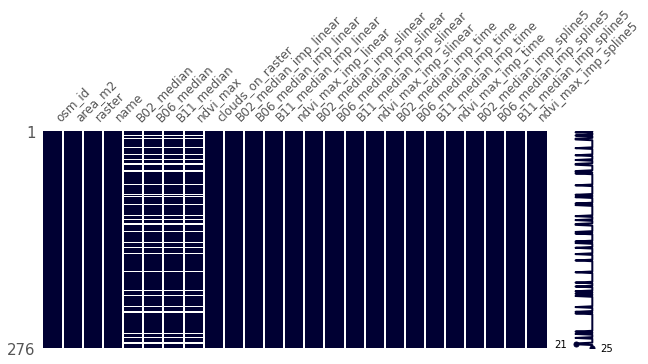

In [28]:
msno.matrix(df_interest_extra2,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

<Figure size 432x288 with 0 Axes>

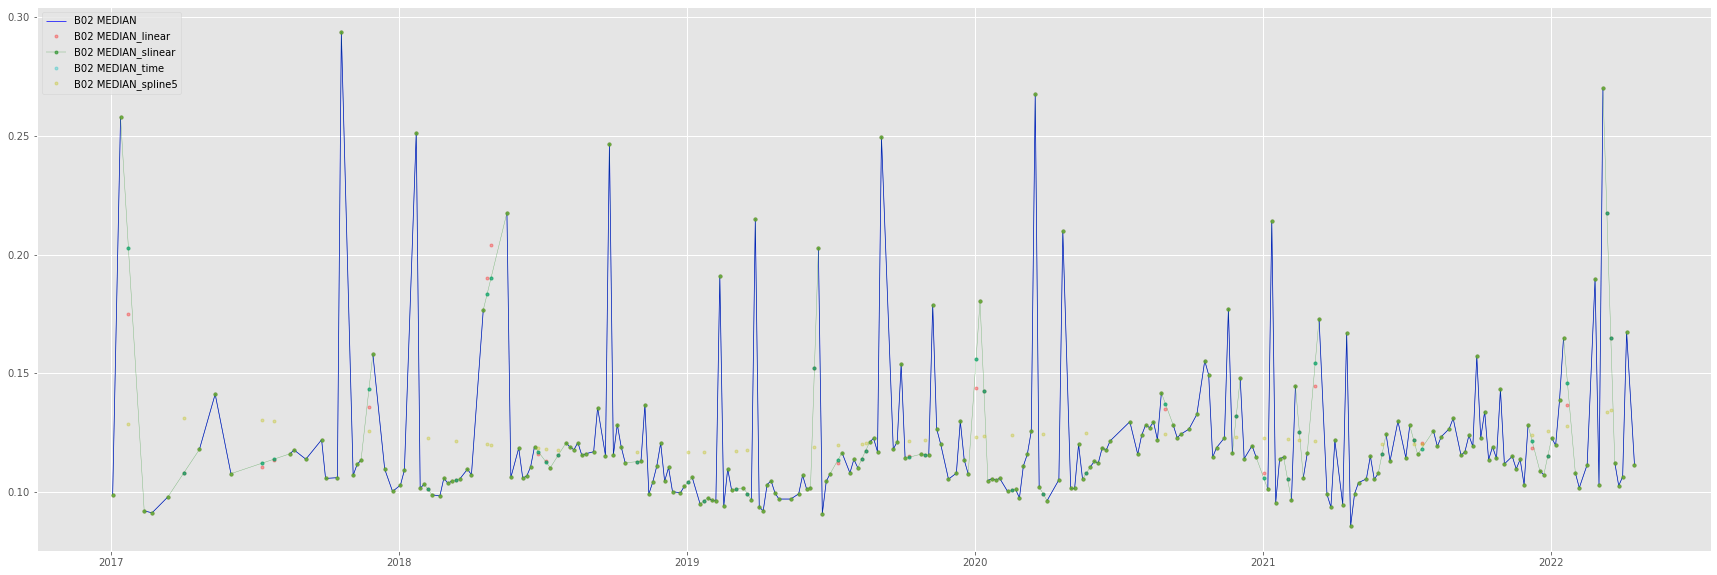

<Figure size 432x288 with 0 Axes>

In [29]:
########  Graficos con imputaciones para B02_median
plt.figure(figsize=(30,10))
from matplotlib import style
plt.plot(df_interest_A1_ps['B02_median'], 'b-', label = 'B02 MEDIAN',linewidth=0.7,alpha=1)
plt.plot(df_interest_extra2['B02_median_imp_linear'], 'r.', label = 'B02 MEDIAN_linear',linewidth=0.5,alpha=0.3)
plt.plot(df_interest_extra2['B02_median_imp_slinear'], 'g.-', label = 'B02 MEDIAN_slinear',linewidth=0.4,alpha=0.5)
plt.plot(df_interest_extra2['B02_median_imp_time'], 'c.', label = 'B02 MEDIAN_time',linewidth=0.5,alpha=0.3)
plt.plot(df_interest_extra2['B02_median_imp_spline5'], 'y.', label = 'B02 MEDIAN_spline5',linewidth=0.3,alpha=0.3)
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

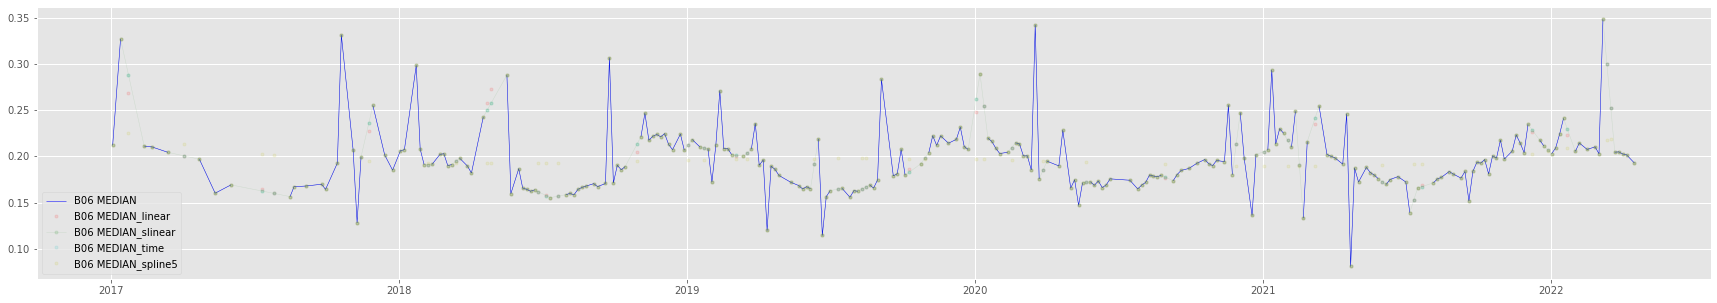

<Figure size 432x288 with 0 Axes>

In [30]:
########  Graficos con imputaciones para B06_median
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1_ps['B06_median'], 'b-', label = 'B06 MEDIAN',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['B06_median_imp_linear'], 'r.', label = 'B06 MEDIAN_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_slinear'], 'g.-', label = 'B06 MEDIAN_slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_time'], 'c.', label = 'B06 MEDIAN_time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_spline5'], 'y.', label = 'B06 MEDIAN_spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

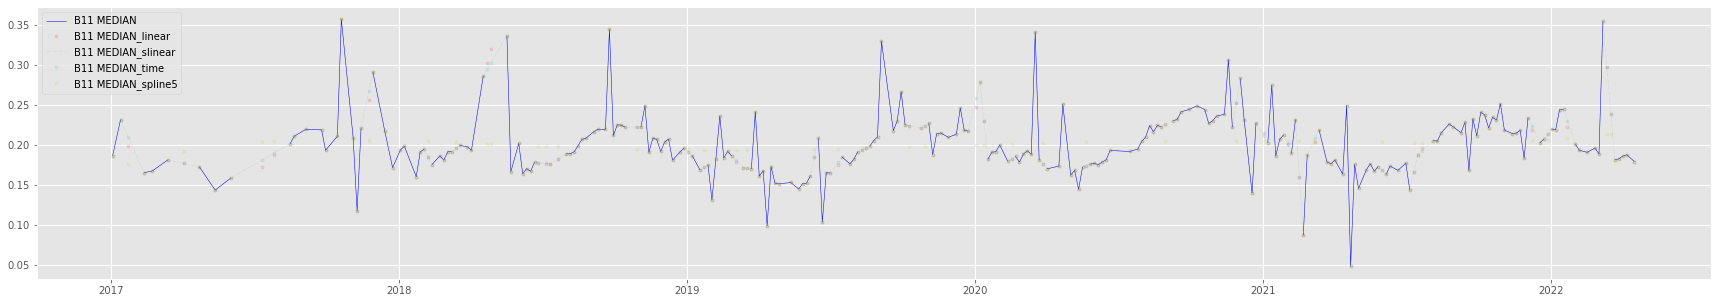

<Figure size 432x288 with 0 Axes>

In [31]:
########  Graficos con imputaciones para B11_median
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1_ps['B11_median'], 'b-', label = 'B11 MEDIAN',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['B11_median_imp_linear'], 'r.', label = 'B11 MEDIAN_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_slinear'], 'g-.', label = 'B11 MEDIAN_slinear',linewidth=0.6,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_time'], 'c.', label = 'B11 MEDIAN_time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_spline5'], 'y.', label = 'B11 MEDIAN_spline5',linewidth=0.2,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

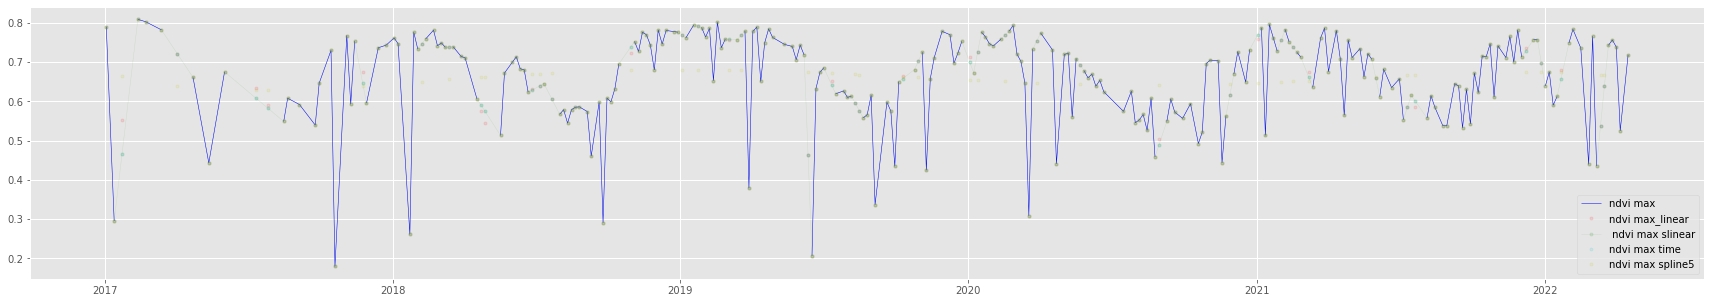

<Figure size 432x288 with 0 Axes>

In [32]:
########  Graficos con imputaciones para ndvi_max
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1_ps['ndvi_max'], 'b-', label = 'ndvi max',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['ndvi_max_imp_linear'], 'r.', label = 'ndvi max_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_slinear'], 'g.-', label = ' ndvi max slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_time'], 'c.', label = 'ndvi max time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_spline5'], 'y.', label = 'ndvi max spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

In [33]:
df_interest_extra2.describe()
df_interest_extra2.head()
df_interest_extra2=pd.DataFrame(df_interest_extra2)
df_interest_extra2

,osm_id,area_m2,raster,name,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster,B02_median_imp_linear,...,B11_median_imp_slinear,ndvi_max_imp_slinear,B02_median_imp_time,B06_median_imp_time,B11_median_imp_time,ndvi_max_imp_time,B02_median_imp_spline5,B06_median_imp_spline5,B11_median_imp_spline5,ndvi_max_imp_spline5
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0987,0.21180,0.18660,0.790476,0.000000,0.0987,...,0.18660,0.790476,0.098700,0.211800,0.18660,0.790476,0.098700,0.211800,0.186600,0.790476
2017-01-13,6170329,859608.565917,S2A_MSIL1C_20170113T142011_N0204_R010_T20JLL_2...,Parque Sarmiento,0.2580,0.32690,0.23170,0.295582,98.880824,0.2580,...,0.23170,0.295582,0.258000,0.326900,0.23170,0.295582,0.258000,0.326900,0.231700,0.295582
2017-01-23,6170329,859608.565917,S2A_MSIL1C_20170123T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,NaN,NaN,NaN,NaN,84.099011,0.1750,...,0.20960,0.466842,0.202667,0.288267,0.20960,0.466842,0.128607,0.224746,0.176089,0.663880
2017-02-12,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0920,0.21100,0.16540,0.809364,0.000000,0.0920,...,0.16540,0.809364,0.092000,0.211000,0.16540,0.809364,0.092000,0.211000,0.165400,0.809364
2017-02-22,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0912,0.21010,0.16730,0.803294,0.000000,0.0912,...,0.16730,0.803294,0.091200,0.210100,0.16730,0.803294,0.091200,0.210100,0.167300,0.803294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1124,0.20440,0.18170,0.743007,0.000000,0.1124,...,0.18170,0.743007,0.112400,0.204400,0.18170,0.743007,0.112400,0.204400,0.181700,0.743007
2022-03-28,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1026,0.20480,0.18250,0.756883,0.000000,0.1026,...,0.18250,0.756883,0.102600,0.204800,0.18250,0.756883,0.102600,0.204800,0.182500,0.756883
2022-04-02,6170329,859608.565917,S2B_MSIL1C_20220402T141729_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1064,0.20250,0.18600,0.739026,0.000000,0.1064,...,0.18600,0.739026,0.106400,0.202500,0.18600,0.739026,0.106400,0.202500,0.186000,0.739026


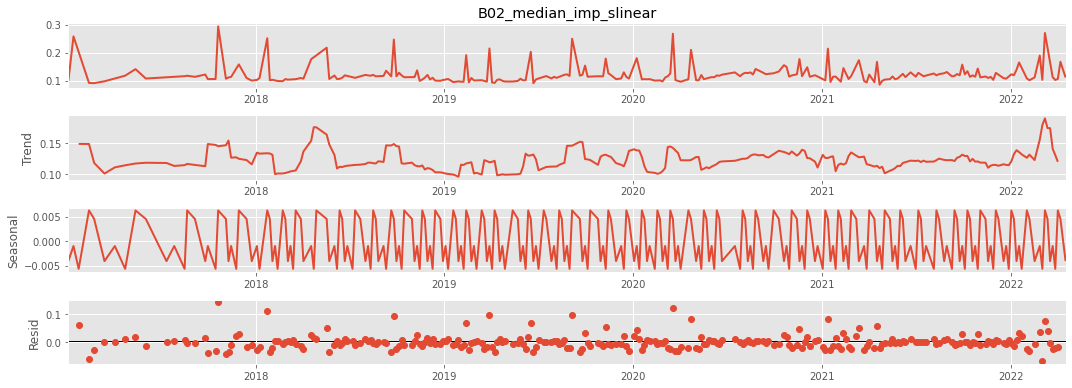

In [34]:
###Se aplica el método aditivo para descomponer las series utilizando la imputacion slinear ya que de otro modo no funciona con NANs el método
# Additive Decomposition 
result_add_B02 = seasonal.seasonal_decompose(df_interest_extra2['B02_median_imp_slinear'], model='additive',period=5)
# Plot
plt.rcParams["figure.figsize"] = (15,5.5)
result_add_B02.plot()
from matplotlib import pyplot
pyplot.show()

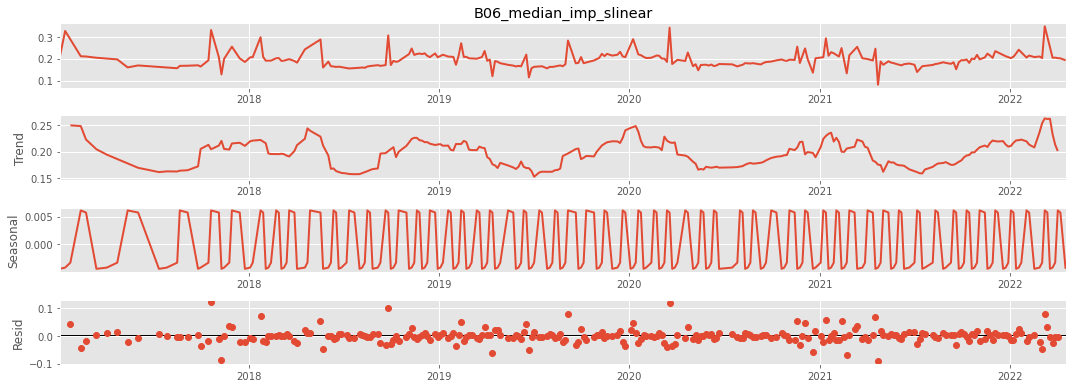

In [35]:
# Additive Decomposition
result_add_B06 = seasonal.seasonal_decompose(df_interest_extra2['B06_median_imp_slinear'], model='additive',period=5)
# Plot
plt.rcParams["figure.figsize"] = (15,5.5)
result_add_B06.plot()
from matplotlib import pyplot
pyplot.show()

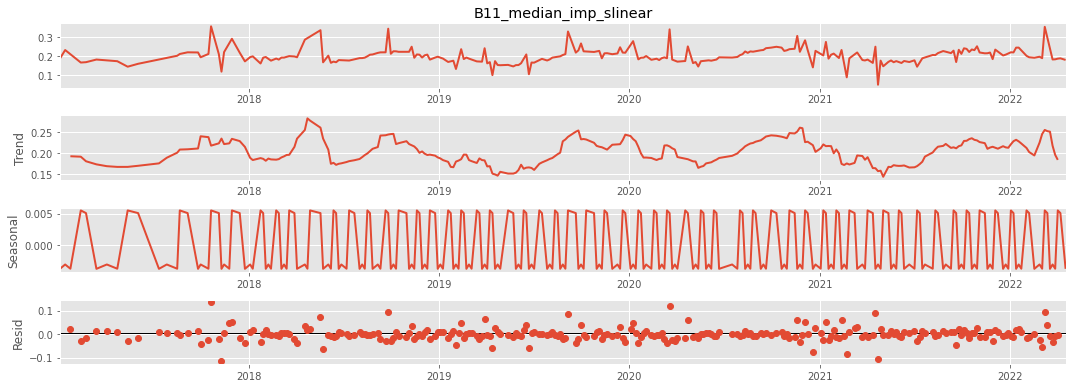

In [36]:
# Additive Decomposition
result_add_B11 = seasonal.seasonal_decompose(df_interest_extra2['B11_median_imp_slinear'], model='additive',period=5)
# Plot
plt.rcParams["figure.figsize"] = (15,5.5)
result_add_B11.plot()
from matplotlib import pyplot
pyplot.show()

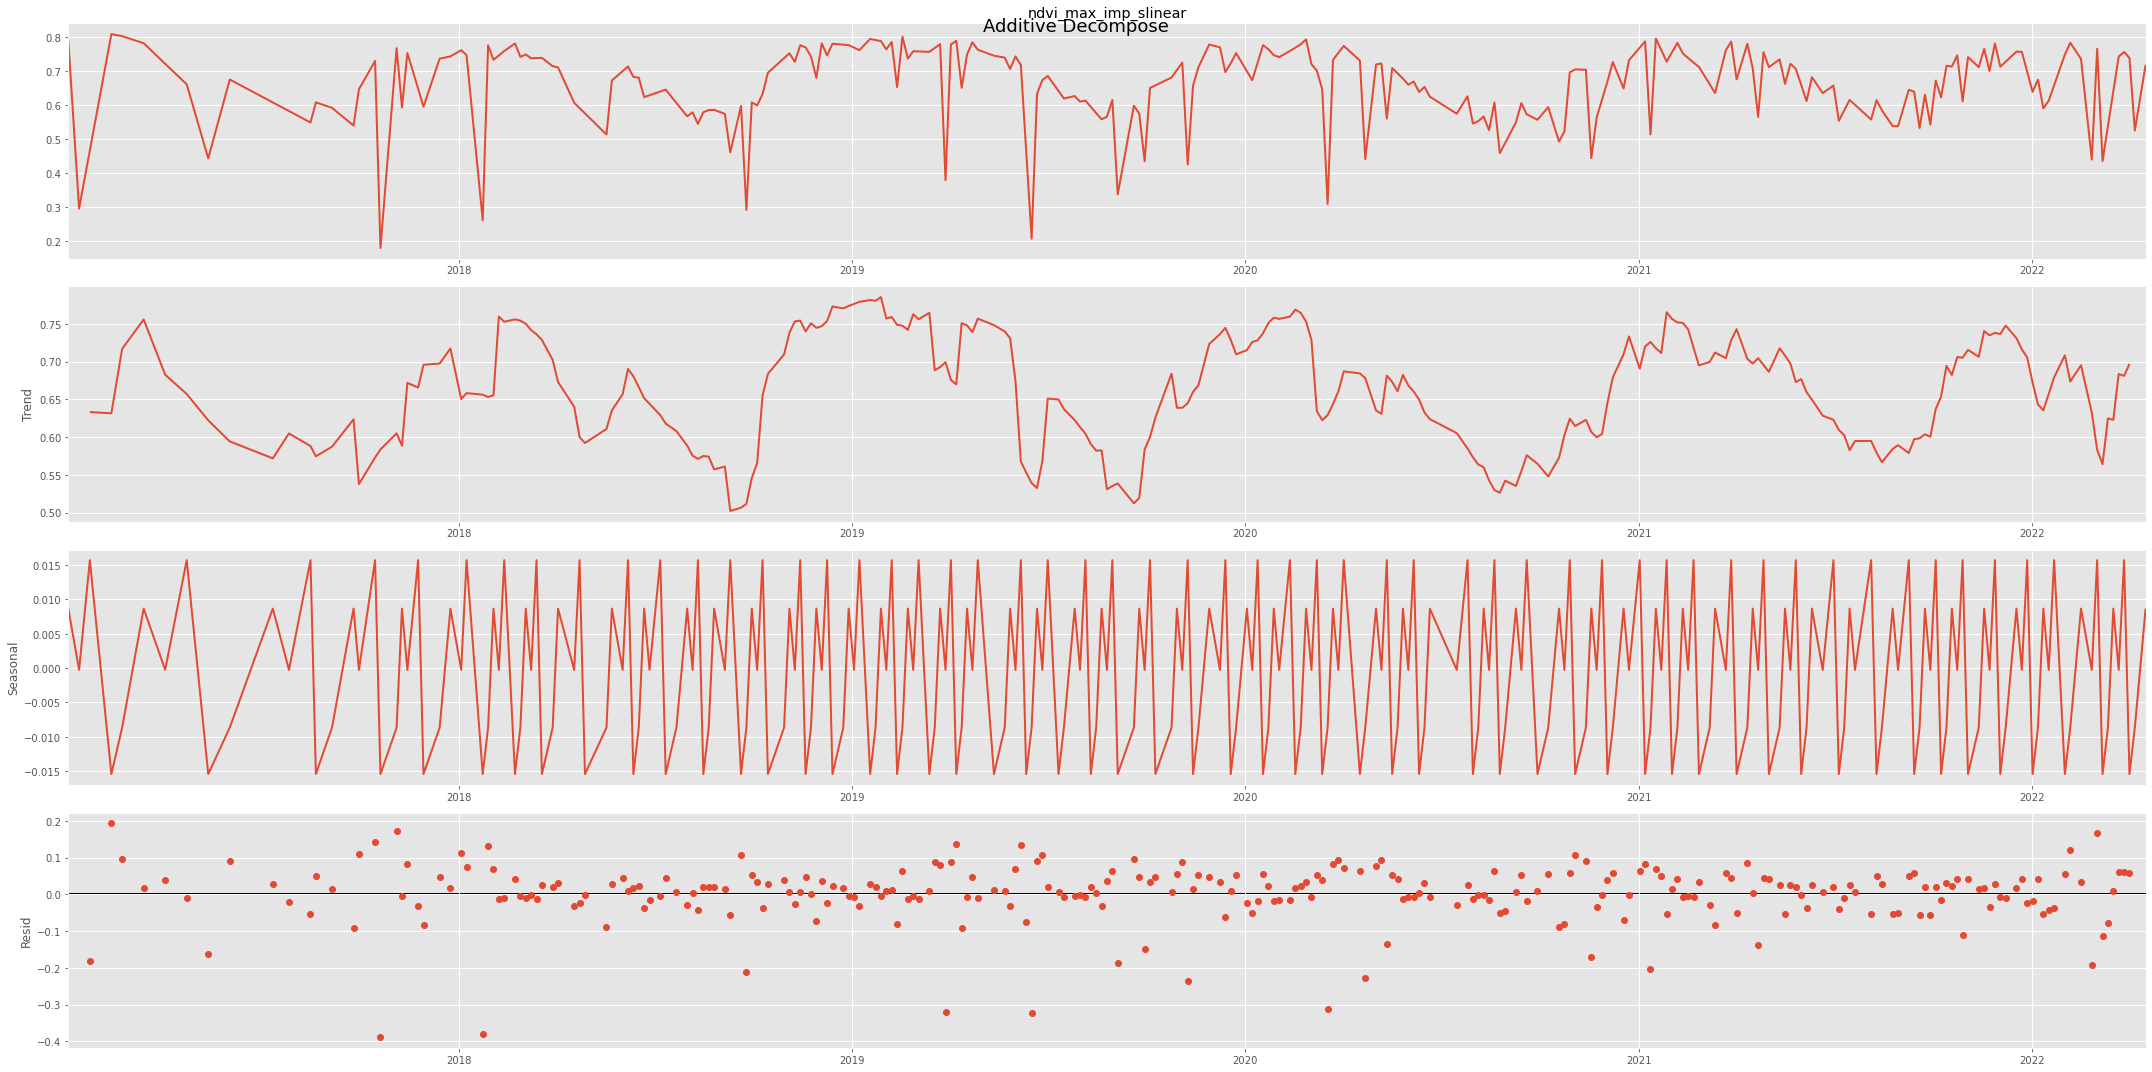

In [37]:
#########################################
# Additive Decomposition
result_add_ndvi_max = seasonal_decompose(df_interest_extra2['ndvi_max_imp_slinear'], model='additive', period=5)
# Plot
plt.rcParams.update({'figure.figsize': (30,15)})
result_add_ndvi_max.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

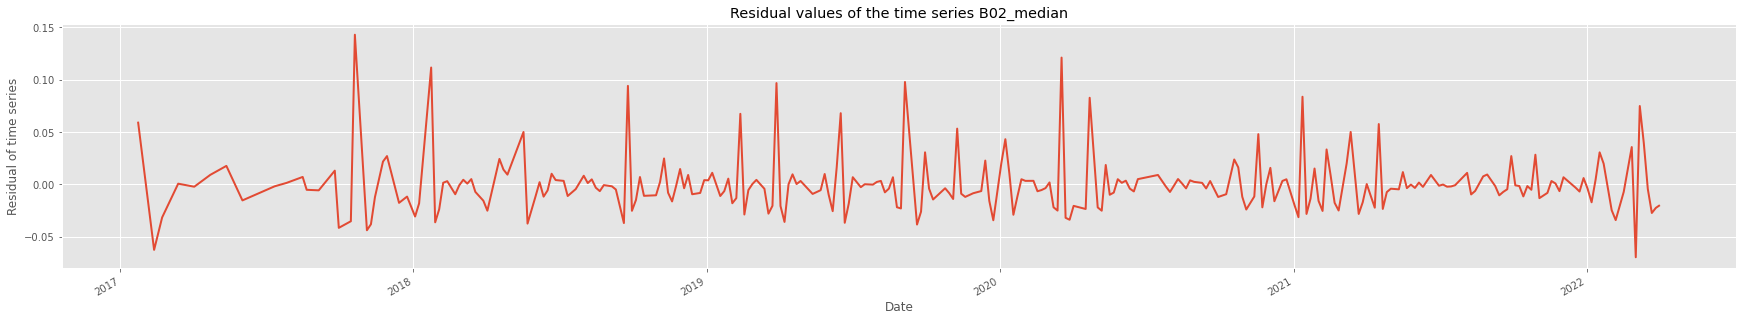

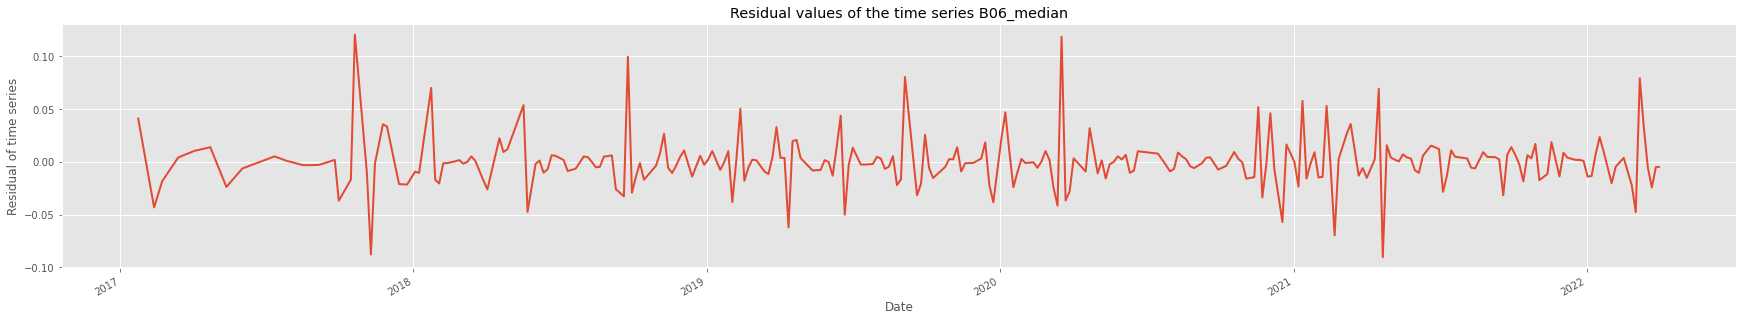

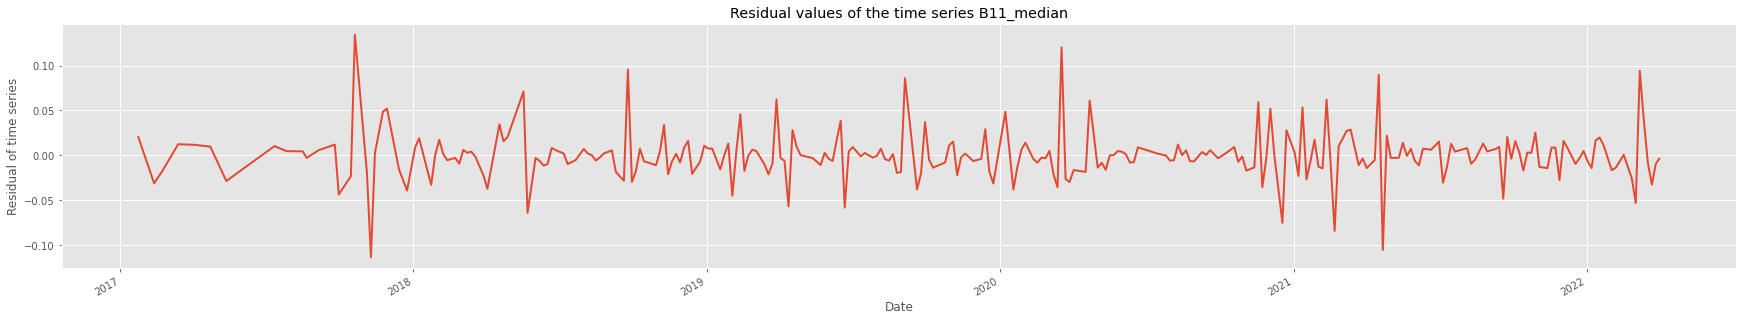

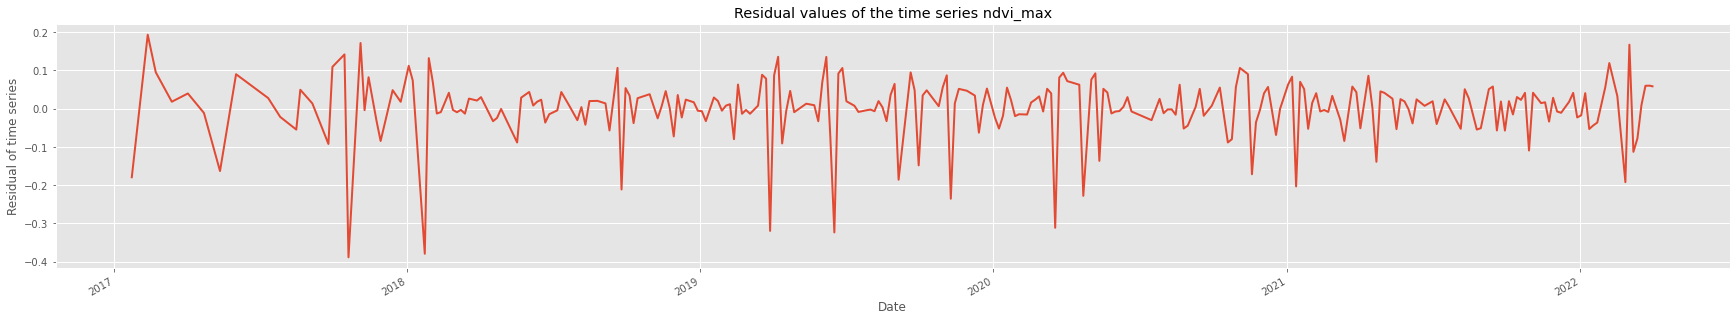

In [38]:
##########################################
##Se grafica el componente 'noise' ###
decomp_resid_B02 = result_add_B02.resid
ax = decomp_resid_B02.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B02_median')
plt.show()
#############
############
decomp_resid_B06 = result_add_B06.resid
ax = decomp_resid_B06.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B06_median')
plt.show()
#############
############
decomp_resid_B11 = result_add_B11.resid
ax = decomp_resid_B11.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B11_median')
plt.show()

#####
decomp_resid_ndvi_max = result_add_ndvi_max.resid
ax = decomp_resid_ndvi_max.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series ndvi_max')
plt.show()

In [39]:
#####################################################################################
## A partir del análisis del componente "noise", se quitan aquellas observaciones con residuos extremos. 
##En este caso se utiliza el criterio del IQR pero se podría
###aplicar una análisis de ARMA para analizar el tipo de outlier que estamos identificando y luego decidir qué hacer.
###################
decomp_resid_B02=pd.DataFrame(decomp_resid_B02)
q1 = decomp_resid_B02['resid'].quantile(0.25)
q3 = decomp_resid_B02['resid'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_B02']=np.where((decomp_resid_B02['resid'] >ls)|(decomp_resid_B02['resid'] < li),1,0)
df_interest_extra2                 

decomp_resid_B06=pd.DataFrame(decomp_resid_B06)
q1 = decomp_resid_B06['resid'].quantile(0.25)
q3 = decomp_resid_B06['resid'].quantile(0.75)
iqr = q3 - q1 
        # calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr

# Generamos nueva columna
df_interest_extra2['out_B06']=np.where((decomp_resid_B06['resid'] >ls)|(decomp_resid_B06['resid'] < li),1,0)
df_interest_extra2

decomp_resid_B11=pd.DataFrame(decomp_resid_B11)
q1 = decomp_resid_B11['resid'].quantile(0.25)
q3 = decomp_resid_B11['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_B11']=np.where((decomp_resid_B11['resid'] >ls)|(decomp_resid_B11['resid'] < li),1,0)
df_interest_extra2
######################################################################
decomp_resid_ndvi_max=pd.DataFrame(decomp_resid_ndvi_max)
q1 = decomp_resid_ndvi_max['resid'].quantile(0.25)
q3 = decomp_resid_ndvi_max['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_ndvi_max']=np.where((decomp_resid_ndvi_max['resid'] >ls)|(decomp_resid_ndvi_max['resid']< li),1,0)
df_interest_extra2
#######################################################

,osm_id,area_m2,raster,name,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster,B02_median_imp_linear,...,B11_median_imp_time,ndvi_max_imp_time,B02_median_imp_spline5,B06_median_imp_spline5,B11_median_imp_spline5,ndvi_max_imp_spline5,out_B02,out_B06,out_B11,out_ndvi_max
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0987,0.21180,0.18660,0.790476,0.000000,0.0987,...,0.18660,0.790476,0.098700,0.211800,0.186600,0.790476,0,0,0,0
2017-01-13,6170329,859608.565917,S2A_MSIL1C_20170113T142011_N0204_R010_T20JLL_2...,Parque Sarmiento,0.2580,0.32690,0.23170,0.295582,98.880824,0.2580,...,0.23170,0.295582,0.258000,0.326900,0.231700,0.295582,0,0,0,0
2017-01-23,6170329,859608.565917,S2A_MSIL1C_20170123T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,NaN,NaN,NaN,NaN,84.099011,0.1750,...,0.20960,0.466842,0.128607,0.224746,0.176089,0.663880,1,1,0,1
2017-02-12,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0920,0.21100,0.16540,0.809364,0.000000,0.0920,...,0.16540,0.809364,0.092000,0.211000,0.165400,0.809364,1,1,0,1
2017-02-22,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0912,0.21010,0.16730,0.803294,0.000000,0.0912,...,0.16730,0.803294,0.091200,0.210100,0.167300,0.803294,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1124,0.20440,0.18170,0.743007,0.000000,0.1124,...,0.18170,0.743007,0.112400,0.204400,0.181700,0.743007,0,0,0,0
2022-03-28,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1026,0.20480,0.18250,0.756883,0.000000,0.1026,...,0.18250,0.756883,0.102600,0.204800,0.182500,0.756883,0,0,0,0
2022-04-02,6170329,859608.565917,S2B_MSIL1C_20220402T141729_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1064,0.20250,0.18600,0.739026,0.000000,0.1064,...,0.18600,0.739026,0.106400,0.202500,0.186000,0.739026,0,0,0,0


C:\Users\Varios\AppData\Local\Temp\ipykernel_31680\3176863920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_extra2_['cant_var_outl']= df_interest_extra2['out_B02']+df_interest_extra2_['out_B06']+df_interest_extra2_['out_B11']+df_interest_extra2_['out_ndvi_max']


0    233
2     14
3     13
4      9
1      7
Name: cant_var_outl, dtype: int64

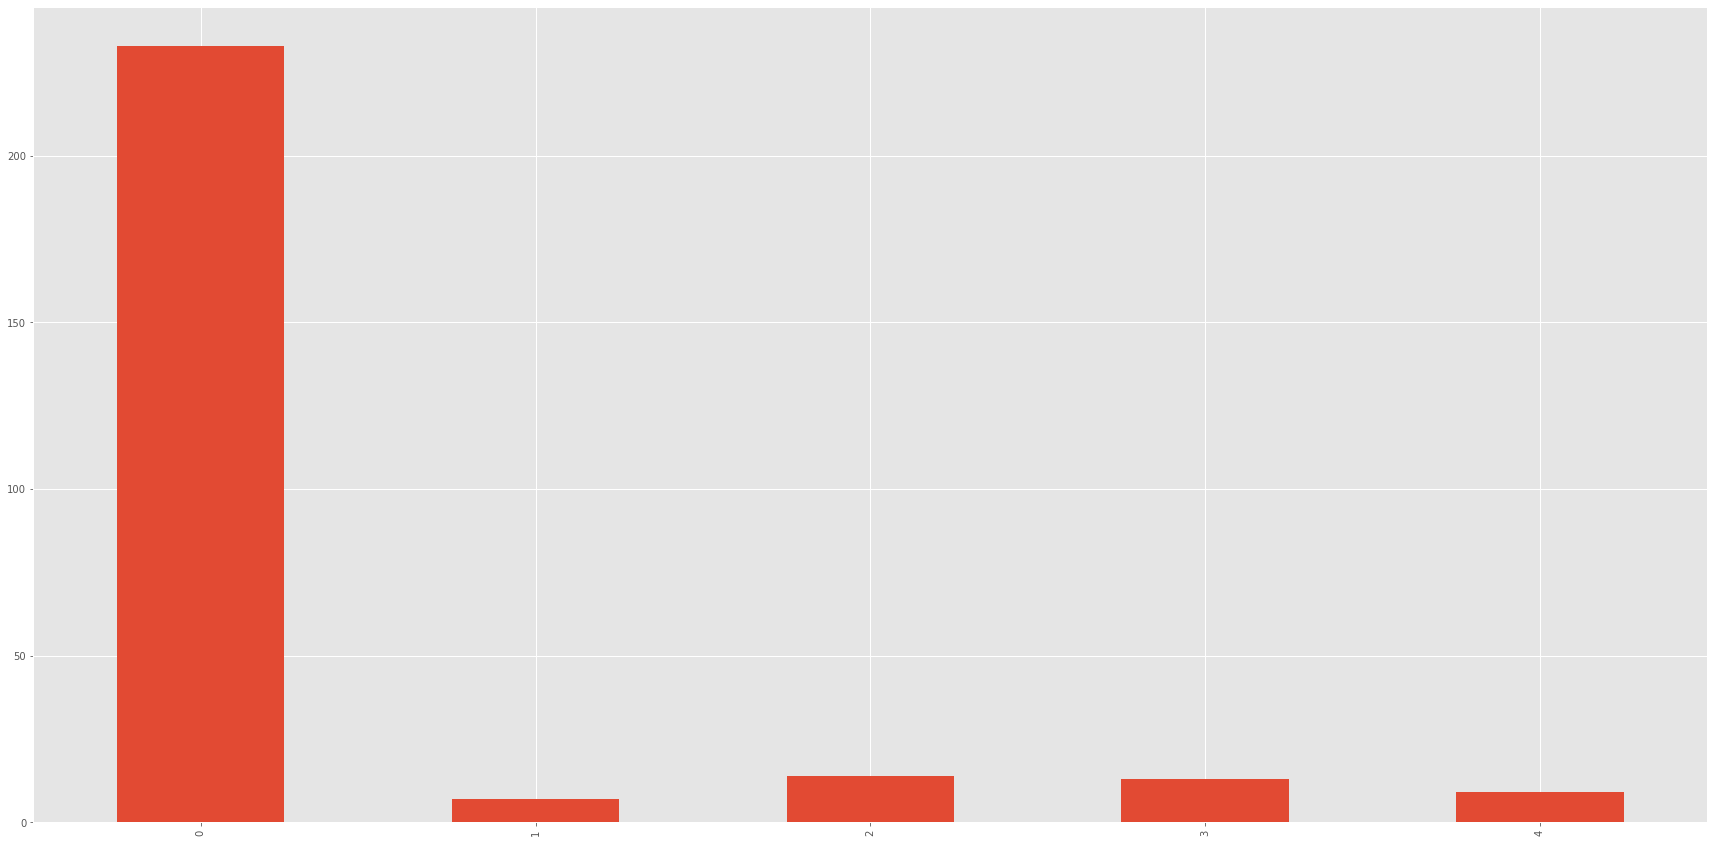

In [40]:
df_interest_extra2_=df_interest_extra2[['B02_median_imp_slinear','B06_median_imp_slinear',
                                        'B11_median_imp_slinear','ndvi_max_imp_slinear',
                                        'out_B02','out_B06','out_B11','out_ndvi_max',
                                        'osm_id','area_m2','raster','clouds_on_raster']]
######
df_interest_extra2_
#######
df_interest_extra2_['cant_var_outl']= df_interest_extra2['out_B02']+df_interest_extra2_['out_B06']+df_interest_extra2_['out_B11']+df_interest_extra2_['out_ndvi_max']
##Cantidad de outliers por observación

df_interest_extra2_['cant_var_outl'].value_counts()[:10].plot(kind='bar')
df_interest_extra2_['cant_var_outl'].value_counts()


In [41]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis, los valores son outliers
df_interest_extra3_ = df_interest_extra2_[~((df_interest_extra2['out_B02']==1) & 
                                  (df_interest_extra2_['out_B06']==1) & 
                                  (df_interest_extra2_['out_B11']==1)& 
                                  (df_interest_extra2_['out_ndvi_max']==1))]
len(df_interest_extra3_)
df_interest_extra3_

,B02_median_imp_slinear,B06_median_imp_slinear,B11_median_imp_slinear,ndvi_max_imp_slinear,out_B02,out_B06,out_B11,out_ndvi_max,osm_id,area_m2,raster,clouds_on_raster,cant_var_outl
date,,,,,,,,,,,,,
2017-01-03,0.098700,0.211800,0.18660,0.790476,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.000000,0
2017-01-13,0.258000,0.326900,0.23170,0.295582,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170113T142011_N0204_R010_T20JLL_2...,98.880824,0
2017-01-23,0.202667,0.288267,0.20960,0.466842,1,1,0,1,6170329,859608.565917,S2A_MSIL1C_20170123T142031_N0204_R010_T20JLL_2...,84.099011,3
2017-02-12,0.092000,0.211000,0.16540,0.809364,1,1,0,1,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,0.000000,3
2017-02-22,0.091200,0.210100,0.16730,0.803294,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,0.112400,0.204400,0.18170,0.743007,0,0,0,0,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,0.000000,0
2022-03-28,0.102600,0.204800,0.18250,0.756883,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.000000,0
2022-04-02,0.106400,0.202500,0.18600,0.739026,0,0,0,0,6170329,859608.565917,S2B_MSIL1C_20220402T141729_N0400_R010_T20JLL_2...,0.000000,0


In [42]:
## Se quitaron las observaciones donde se observaron outliers en las 3 bandas elegidas y ndvi_max. En total suman 7 observaciones.

<AxesSubplot:>

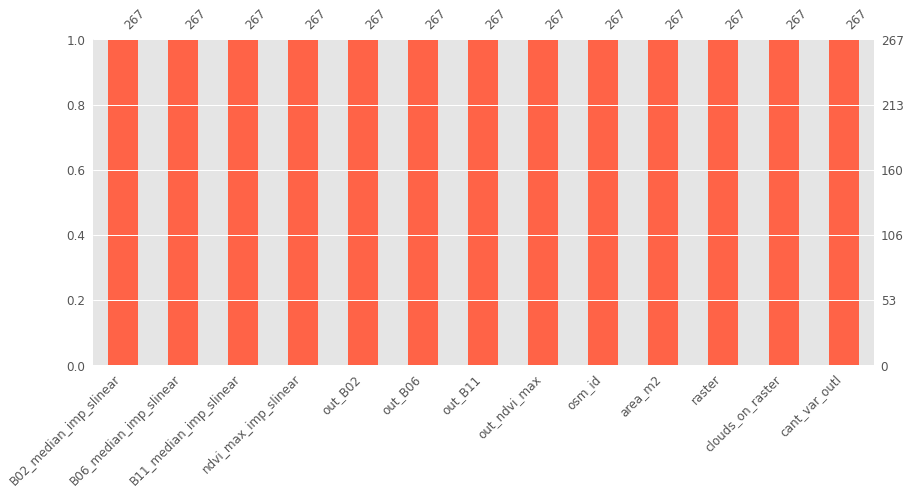

In [43]:
msno.bar(df_interest_extra3_,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 

<AxesSubplot:xlabel='clouds_on_raster', ylabel='Count'>

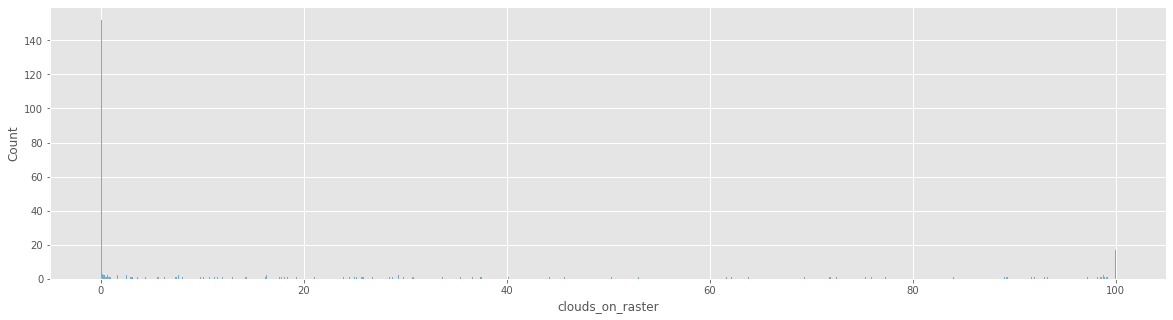

In [44]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.histplot(data=df_interest_extra3_['clouds_on_raster'],binwidth=0.1)

In [45]:
##Filtrar por nubosidad < 10%
df_interest_extra4=df_interest_extra3_[df_interest_extra3_['clouds_on_raster']<10]
len(df_interest_extra4)

183

In [46]:
df_interest_extra5=df_interest_extra3_[df_interest_extra3_['clouds_on_raster']<40]
len(df_interest_extra5)
df_interest_extra5.columns

Index(['B02_median_imp_slinear', 'B06_median_imp_slinear',
       'B11_median_imp_slinear', 'ndvi_max_imp_slinear', 'out_B02', 'out_B06',
       'out_B11', 'out_ndvi_max', 'osm_id', 'area_m2', 'raster',
       'clouds_on_raster', 'cant_var_outl'],
      dtype='object')

In [47]:
###Normalización de las variables bajo análisis en el rango 0,1
###################
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
df_interest_extra4[['B02_median_imp_slinear_scl','B06_median_imp_slinear_scl',
                              'B11_median_imp_slinear_scl',
                              'ndvi_max_imp_slinear_scl',
                               'clouds_on_raster_scl']] = scaler.fit_transform(df_interest_extra4[['B02_median_imp_slinear',
                              'B06_median_imp_slinear',
                              'B11_median_imp_slinear',
                              'ndvi_max_imp_slinear',
                               'clouds_on_raster']])
df_interest_extra4

C:\Users\Varios\AppData\Local\Temp\ipykernel_31680\2672752812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_extra4[['B02_median_imp_slinear_scl','B06_median_imp_slinear_scl',
C:\Users\Varios\anaconda3\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median_imp_slinear,B06_median_imp_slinear,B11_median_imp_slinear,ndvi_max_imp_slinear,out_B02,out_B06,out_B11,out_ndvi_max,osm_id,area_m2,raster,clouds_on_raster,cant_var_outl,B02_median_imp_slinear_scl,B06_median_imp_slinear_scl,B11_median_imp_slinear_scl,ndvi_max_imp_slinear_scl,clouds_on_raster_scl
date,,,,,,,,,,,,,,,,,,
2017-01-03,0.0987,0.2118,0.1866,0.790476,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0.098814,0.722702,0.476448,0.946110,0.0
2017-02-12,0.0920,0.2110,0.1654,0.809364,1,1,0,1,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,0.0,3,0.010540,0.716418,0.361668,1.000000,0.0
2017-02-22,0.0912,0.2101,0.1673,0.803294,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,0.0,0,0.000000,0.709348,0.371954,0.982680,0.0
2017-03-14,0.0979,0.2043,0.1813,0.782493,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170314T142031_N0204_R010_T20JLL_2...,0.0,0,0.088274,0.663786,0.447753,0.923333,0.0
2017-06-02,0.1077,0.1691,0.1588,0.675599,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170602T142041_N0205_R010_T20JLL_2...,0.0,0,0.217391,0.387274,0.325934,0.618341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16,0.1115,0.2074,0.1908,0.736237,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20220216T141741_N0400_R010_T20JLL_2...,0.0,0,0.267457,0.688138,0.499188,0.791353,0.0
2022-03-23,0.1124,0.2044,0.1817,0.743007,0,0,0,0,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,0.0,0,0.279315,0.664572,0.449919,0.810669,0.0
2022-03-28,0.1026,0.2048,0.1825,0.756883,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,0,0.150198,0.667714,0.454250,0.850262,0.0


In [48]:
## se guarda el archivo con los datos imputados bajo interpolación slinear, 
#identificación de outliers a partir del análisis del ruido 
#y normalización con MaxminScaler y por último filtrado por nubosidad menor a 10%
from pathlib import Path  
#filepath = Path('Resultado_tp1/DF.csv') 
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/Resultado_serie_tiempo_parque_sarmiento.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_interest_extra4.to_csv(filepath) 

In [49]:
##Como se mencionó previamente, la estructura de datos del dataset se asemeja con un panel de datos
##En esta segunda parte vamos a reformular el dataset como datos de panel

In [50]:
##al dataset se lo transforma en datos de panel con formato wide
df_paneldata = df_interest_A1.pivot_table(values=['B02_median','B06_median','B11_median','clouds_on_raster','area_m2','ndvi_max'],
                                index='date',
                                columns=['osm_id','name'])
df_paneldata.head()



B02_median                                               \
osm_id            6170329                    6747400           7319079     
name       Parque Sarmiento Plaza Eduardo Cammisa Teco Parque de la Vida   
date                                                                       
2017-01-03           0.0987                     0.0922            0.0998   
2017-01-13           0.2580                        NaN               NaN   
2017-01-23              NaN                        NaN            0.1029   
2017-02-12           0.0920                     0.0854            0.0911   
2017-02-22           0.0912                     0.0879            0.0894   

                                                                 \
osm_id                             7322563            9319594     
name       Reserva Natural Parque San Martín Parque del Chateau   
date                                                              
2017-01-03                            0.0834             0.0801   
2017-01-13                               NaN                NaN   
2017-01-23                               NaN                NaN   
2017-02-12                            0.0783             0.0749   
2017-02-22                            0.0797             0.0768   

                                                                           \
osm_id                 23300957         25622122                25925819    
name       Plaza de las Américas Plaza San Martín Plaza de la Intendencia   
date                                                                        
2017-01-03                0.1136          0.12785                  0.0985   
2017-01-13                   NaN          0.25395                     NaN   
2017-01-23                   NaN              NaN                     NaN   
2017-02-12                0.1068          0.11420                  0.1242   
2017-02-22                0.1071          0.11240                  0.1259   

                                          ...                    ndvi_max  \
osm_id        25925923         25926534   ...                   737514377   
name       Plaza Italia Paseo Sobremonte  ... Plaza Doctor Ruben A. Marti   
date                                      ...                               
2017-01-03       0.1096          0.10235  ...                    0.610778   
2017-01-13          NaN              NaN  ...                         NaN   
2017-01-23          NaN              NaN  ...                         NaN   
2017-02-12       0.0939          0.09590  ...                    0.659411   
2017-02-22       0.0928          0.09630  ...                    0.631692   

                                                                        \
osm_id     737729683                      751430168          755698779   
name           Plaza Nuevo Parque de la Legislatura Plaza San Fernando   
date                                                                     
2017-01-03  0.640319                       0.474636           0.655978   
2017-01-13       NaN                       0.232200                NaN   
2017-01-23       NaN                            NaN           0.633023   
2017-02-12  0.616304                       0.474203           0.704132   
2017-02-22  0.700792                       0.586508           0.639225   

                                                                              \
osm_id              755698781          755698782                   756344848   
name       Paseo San Fernando Paseo San Fernando Parque Ciudad Universitaria   
date                                                                           
2017-01-03           0.666743           0.613663                    0.740741   
2017-01-13                NaN                NaN                         NaN   
2017-01-23           0.623649           0.553918                         NaN   
2017-02-12           0.671739           0.648773                    0.759641   
2017-02-22           0.654179    

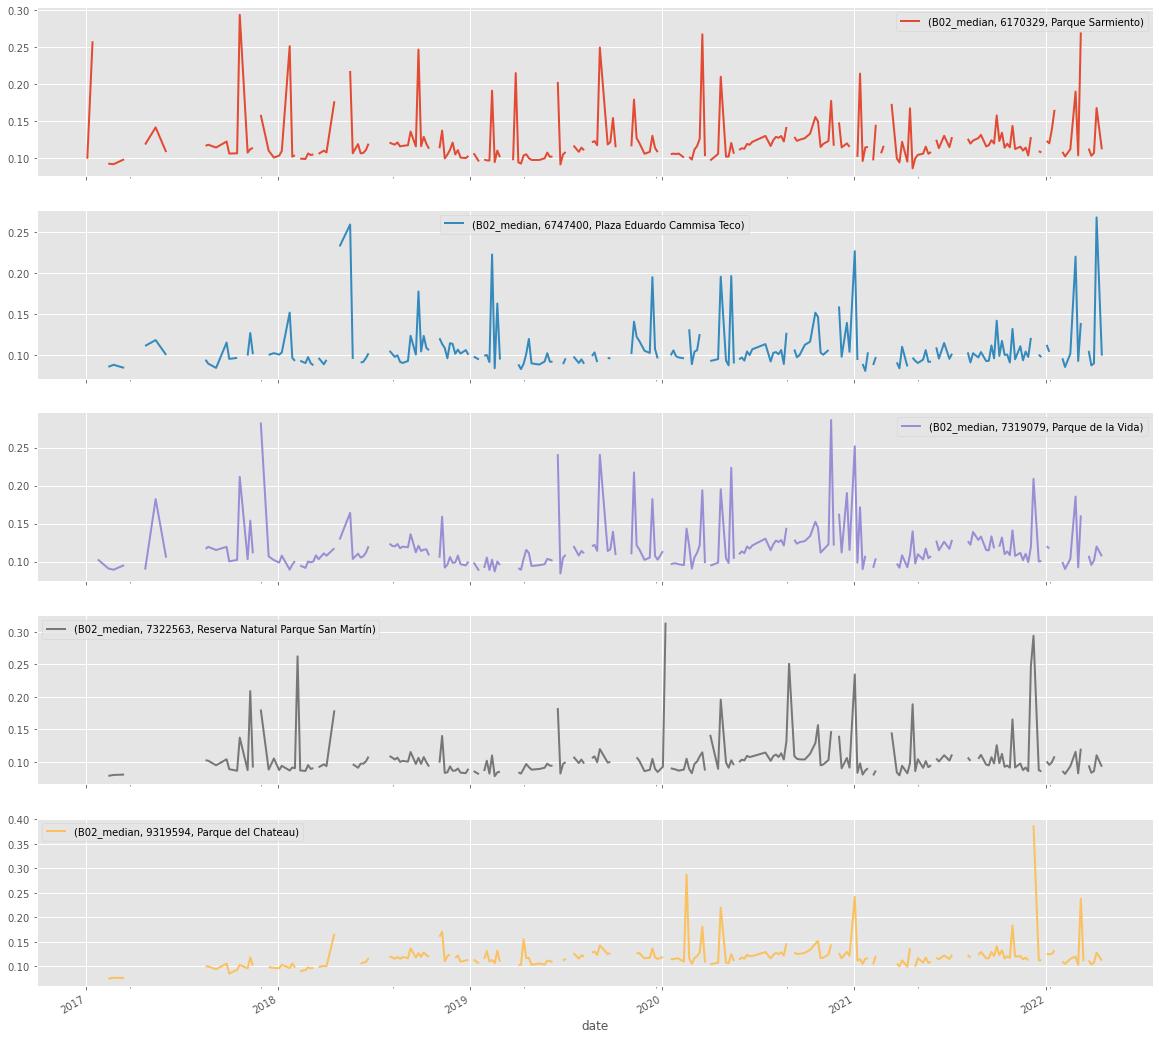

In [51]:
##A continuación se presenta los gráficos de la variable B02_median para las primeras 10 osm_id (espacios verdes)
import matplotlib.pyplot as plt
df_paneldata.iloc[:,:5].plot(subplots=True, figsize=(20,20))
plt.show()

In [52]:
#Para continuar con la curación habría que definir el tipo de panel , si es de efectos fijos o aleatorios 
##para luego poder analizar cuánto afectan a los modelos a aplicar los valores faltantes y los diferentes tipos de outliers que se puedan identificar.